In [3]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(455)

In [27]:
X1 = pd.DataFrame(np.random.normal(0.2,1.0,(75,100)))
X1['label'] = 75*['a']
X2 = pd.DataFrame(np.random.normal(0.6,0.8,(75,100)))
X2['label'] = 75*['b']
X3 = pd.DataFrame(np.random.normal(1.0,0.2,(75,100)))
X3['label'] = 75*['c']
X4 = pd.DataFrame(np.random.normal(0.8,4.0,(75,100)))
X4['label'] = 75*['d']
X5 = pd.DataFrame(np.random.normal(1.2,0.5,(75,100)))
X5['label'] = 75*['e']
complete_df = X1.append(X2,ignore_index=True)
complete_df = complete_df.append(X3,ignore_index=True)
complete_df = complete_df.append(X4,ignore_index=True)
complete_df = complete_df.append(X5,ignore_index=True)
complete_df = complete_df.sample(frac=1).reset_index(drop=True)
complete_df.to_csv('data_for_niky.csv')


In [8]:
data_subset = complete_df.iloc[:,:-1].values
data_subset.shape

(375, 100)

In [9]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 375 samples in 0.019s...
[t-SNE] Computed neighbors for 375 samples in 0.342s...
[t-SNE] Computed conditional probabilities for sample 375 / 375
[t-SNE] Mean sigma: 1.612030
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.303955
[t-SNE] KL divergence after 300 iterations: 1.326611


In [10]:
tsne_df = pd.DataFrame(tsne_results)
tsne_df.shape

(375, 2)

In [11]:
complete_df['tsne-2d-one'] = tsne_df.iloc[:,0]
complete_df['tsne-2d-two'] = tsne_df.iloc[:,1]
complete_df

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,label,tsne-2d-one,tsne-2d-two
0,-1.393305,0.050203,1.576634,4.731719,-4.269717,-1.976426,-5.130615,-4.556126,-7.908972,-1.155160,...,-8.673400,1.153967,0.386491,-3.706908,-0.006610,6.107433,3.541253,d,-3.173391,8.268925
1,0.845581,1.060677,0.273288,-0.094743,-0.301275,-0.298379,1.114388,0.455642,-0.314239,1.154175,...,0.790308,1.628074,0.938037,-0.037543,-0.155103,1.639801,0.313682,b,-4.710183,1.786822
2,1.255109,0.867194,1.180271,1.108943,0.767425,1.423522,1.035651,1.120986,0.815494,0.651641,...,1.183246,1.031571,0.976362,1.112079,0.995261,0.616406,1.228175,c,3.713301,-0.555806
3,1.826709,0.889195,1.221161,0.495616,1.375648,1.033702,1.121724,1.447413,0.383232,1.579351,...,1.076782,1.911104,0.953058,2.189534,1.476966,1.103361,1.578345,e,2.361677,-4.572714
4,0.275081,0.390276,0.966198,-0.844763,1.209324,0.754583,0.651556,0.077719,0.859195,1.331862,...,0.023908,-0.252217,1.627932,0.683788,1.968638,1.442236,0.954757,b,-9.391655,-1.694377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0.861174,0.718499,1.239043,0.817007,0.979924,0.648013,1.077844,1.318773,1.200892,0.821315,...,1.411176,1.214361,0.535754,0.980504,0.910418,0.927192,1.186863,c,2.715322,-1.443951
371,-6.832619,-6.857219,2.095236,0.644405,-0.453877,0.160992,0.648104,3.862107,13.776592,-6.777667,...,1.634003,-6.192642,-9.873842,-1.565652,0.153953,-3.263598,2.368112,d,-13.166720,-0.957655
372,5.546872,-7.337317,-4.408376,6.157124,-0.790087,-3.680888,-2.558647,-5.020486,1.649909,0.016170,...,-0.277429,3.653766,-4.216003,-1.776868,-1.354112,-3.661431,-0.942083,d,-7.707613,-8.638792
373,0.965803,1.180282,1.108046,1.273293,1.082501,0.943676,0.799645,0.870578,1.125527,1.036450,...,1.097282,1.303740,0.922271,1.026929,1.258864,1.168529,1.396487,c,2.633668,0.541977


No handles with labels found to put in legend.


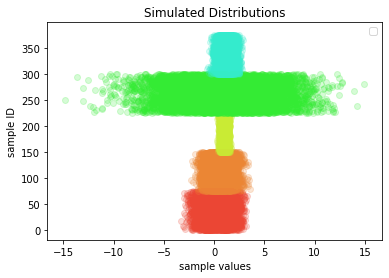

In [25]:
fig,ax = plt.subplots(1,1)
colors = {'a':'#eb4634', 'b':'#eb8634','c':'#c9eb34','d':'#34eb34','e':'#34ebcd'}
for i,row in complete_df.iterrows():
    ax.scatter(row[:-3].values,len(row[:-3])*[i],c=colors[row['label']],alpha=0.2)
#     ax.axvline(0.2,color='k',linestyle='--')
#     ax.axvline(0.6,color='k',linestyle=':')
#     ax.axvline(0.8,color='k',linestyle='-')
#     ax.axvline(1.0,color='k',linestyle=':')
#     ax.axvline(1.2,color='k',linestyle='--')

plt.title('Simulated Distributions')
plt.ylabel('sample ID')
plt.xlabel('sample values')
plt.legend()


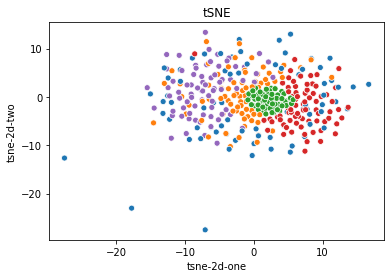

In [18]:
a_plot = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label", #sns.color_palette("viridis", 3),
    data=complete_df,
    legend=False,
    alpha=1.0
)
plt.title('tSNE')


plt.show()

In [236]:
complete_df

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,label,tsne-2d-one,tsne-2d-two
0,-1.031272,1.152714,0.259588,1.870150,-1.070928,0.983335,-0.050483,0.123444,-0.181945,-0.193219,...,1.175245,0.239725,-0.519690,0.954607,1.183841,1.559644,-0.655009,a,9.271191,-9.026628
1,-0.380670,-0.811872,0.618642,-0.888362,0.425046,0.919732,0.666051,1.562754,-0.146385,0.685193,...,-0.571949,-0.720468,-0.082506,1.457562,0.011625,-0.051700,1.872475,a,10.076982,-8.516369
2,0.564196,-2.255261,-0.665396,0.076601,-1.167273,0.408638,1.501355,1.070704,-0.163067,0.165646,...,1.151956,-1.222606,-1.146649,-0.612474,-0.177707,0.153584,-0.021075,a,9.967343,-8.692054
3,1.762208,-1.653347,1.323193,-0.021041,0.786882,-0.752319,-0.342266,0.408720,-1.373703,1.307847,...,0.521593,-0.163340,0.794702,-1.656719,1.947906,-0.736380,0.372420,a,10.982291,-9.226173
4,-0.075803,0.469614,-0.306055,-0.353145,0.550635,1.593534,1.752938,-0.331697,2.103463,0.200723,...,-0.049862,-0.497215,0.334782,2.984723,0.335193,-1.902272,-0.266976,a,10.967460,-7.686344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,3.798342,3.134205,1.316216,3.343884,1.806030,1.465920,3.165338,2.270936,2.340350,0.638965,...,2.818010,1.069711,3.034391,3.259639,0.907810,1.598186,4.674909,c,-9.088199,6.676447
221,2.611033,2.733104,3.084925,3.047853,1.514153,3.722554,5.536119,3.995855,4.274519,2.987405,...,1.325114,2.933638,0.755849,4.001623,3.600468,1.477301,1.708779,c,-7.681590,7.510316
222,2.316801,1.971664,2.804432,2.048281,4.076856,1.060596,2.205632,2.079988,1.587803,1.516567,...,2.400013,0.681856,2.497855,1.630140,2.711053,3.764103,4.097840,c,-6.766752,5.545649
223,1.082794,-0.121600,3.096205,3.462624,1.441802,2.138038,3.419253,5.063031,-0.229065,3.364852,...,2.001821,3.117453,1.568103,2.842479,3.011146,2.296539,2.130123,c,-5.848111,7.209177


In [225]:
colors['a']

'#00b5b8'

In [266]:
fig,ax = plt.subplots(1,1)
colors = {'a':'red', 'b':'blue'}
for i,row in complete_df.iterrows():
    ax.scatter(row[:-3].values,len(row[:-3])*[i],c=colors[row['label']],alpha=0.5)
    ax.axvline(0.2,color='k',linestyle='--')
    ax.axvline(1.5,color='k',linestyle=':')

plt.title('Simulated Distributions')
plt.ylabel('sample ID')
plt.xlabel('sample values')
plt.legend()


No handles with labels found to put in legend.
